# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
print(df.columns)

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'mau', 'renda'],
      dtype='object')


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [6]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [7]:
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(str)

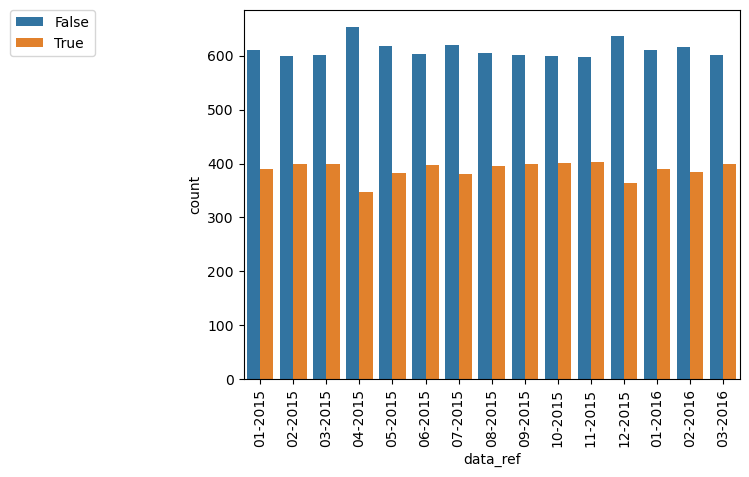

In [8]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=df)

dados_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=90)

plt.legend(bbox_to_anchor=(-0.30, 1), loc=1, borderaxespad=0.)

In [9]:
df['posse_de_imovel'] = df['posse_de_imovel'].astype(str)

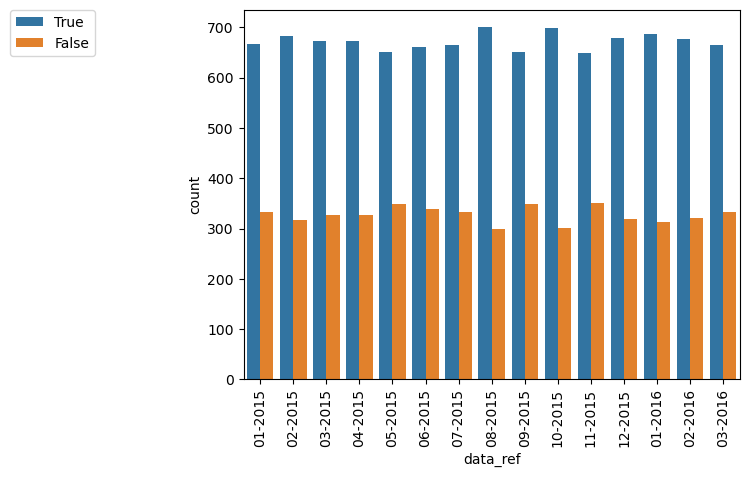

In [10]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=df)

dados_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=90)

plt.legend(bbox_to_anchor=(-0.30, 1), loc=1, borderaxespad=0.)

Nos meses de agosto e outubro, observou-se um aumento no número de clientes com imóvel. Além disso, houve um leve crescimento no número de clientes sem carro em março e dezembro de 2015.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

C:\Users\gusta\AppData\Local\Temp\ipykernel_22364\2802779721.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',


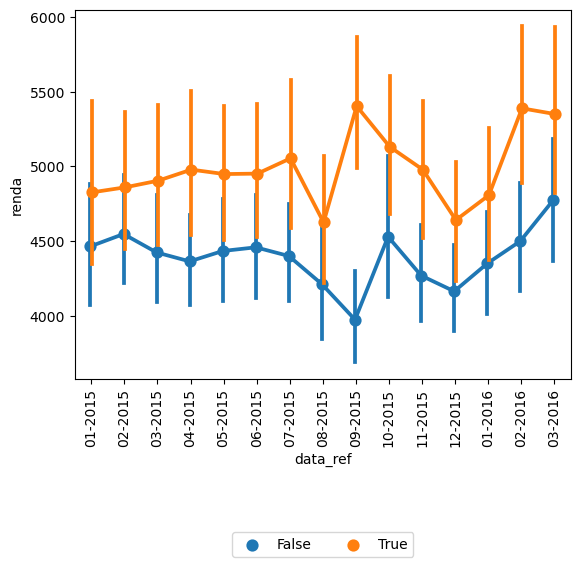

In [13]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',
                   data=df, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

C:\Users\gusta\AppData\Local\Temp\ipykernel_22364\907574735.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',


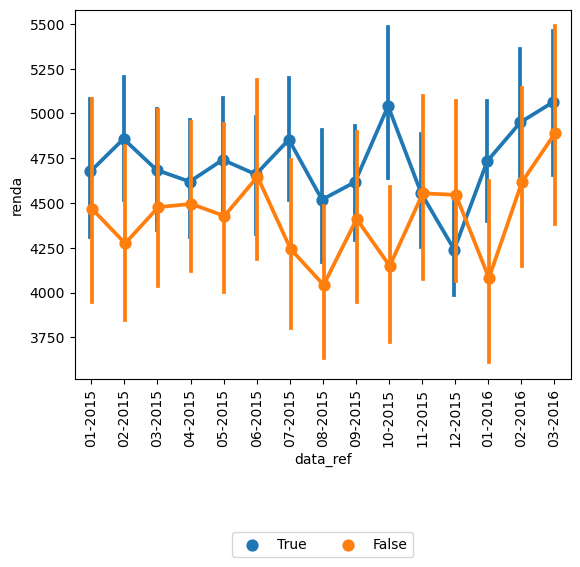

In [14]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',
                   data=df, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(1, -.30),ncol = 3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

Houve uma variação significativa em 09/2015 e 02/2016, marcada pelo aumento na renda das pessoas com posse de veículo. Além disso, em 10/2015, foi observada uma oscilação na renda das pessoas com posse de imóvel, que inicialmente aumentou, depois diminuiu, e voltou a crescer.